<a href="https://colab.research.google.com/github/vbuddharaju4/DEVTERNN/blob/main/Uber_trips_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "/content/drive/MyDrive/uber-raw-data-sep14.csv"


In [ ]:
data = pd.read_csv(path)

In [ ]:
data

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [ ]:
data.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [ ]:
data.describe()

,Lat,Lon
count,1.028136e+06,1.028136e+06
mean,4.073922e+01,-7.397182e+01
std,4.082861e-02,5.831413e-02
min,3.998970e+01,-7.477360e+01
25%,4.072040e+01,-7.399620e+01
50%,4.074180e+01,-7.398310e+01
75%,4.076120e+01,-7.396280e+01
max,4.134760e+01,-7.271630e+01


In [ ]:
data["Date/Time"] = pd.to_datetime(data["Date/Time"].head(10000000))  # Change 10000000 to a smaller number


In [ ]:
data["Date/Time"] = pd.to_datetime(data["Date/Time"])
data["day"] = data["Date/Time"].dt.day


In [ ]:
data["day"]=data["Date/Time"].apply(lambda x: x.day)
data["weekdays"]=data["Date/Time"].apply(lambda x: x.weekday())
data["hour"]=data["Date/Time"].apply(lambda x: x.hour)

In [ ]:
data

,Date/Time,Lat,Lon,Base,day,weekdays,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0
...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,1,22
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,1,22
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,1,22
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,1,22


<ipython-input-89-d29b96ca0324>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["day"])


<Axes: xlabel='day', ylabel='Density'>

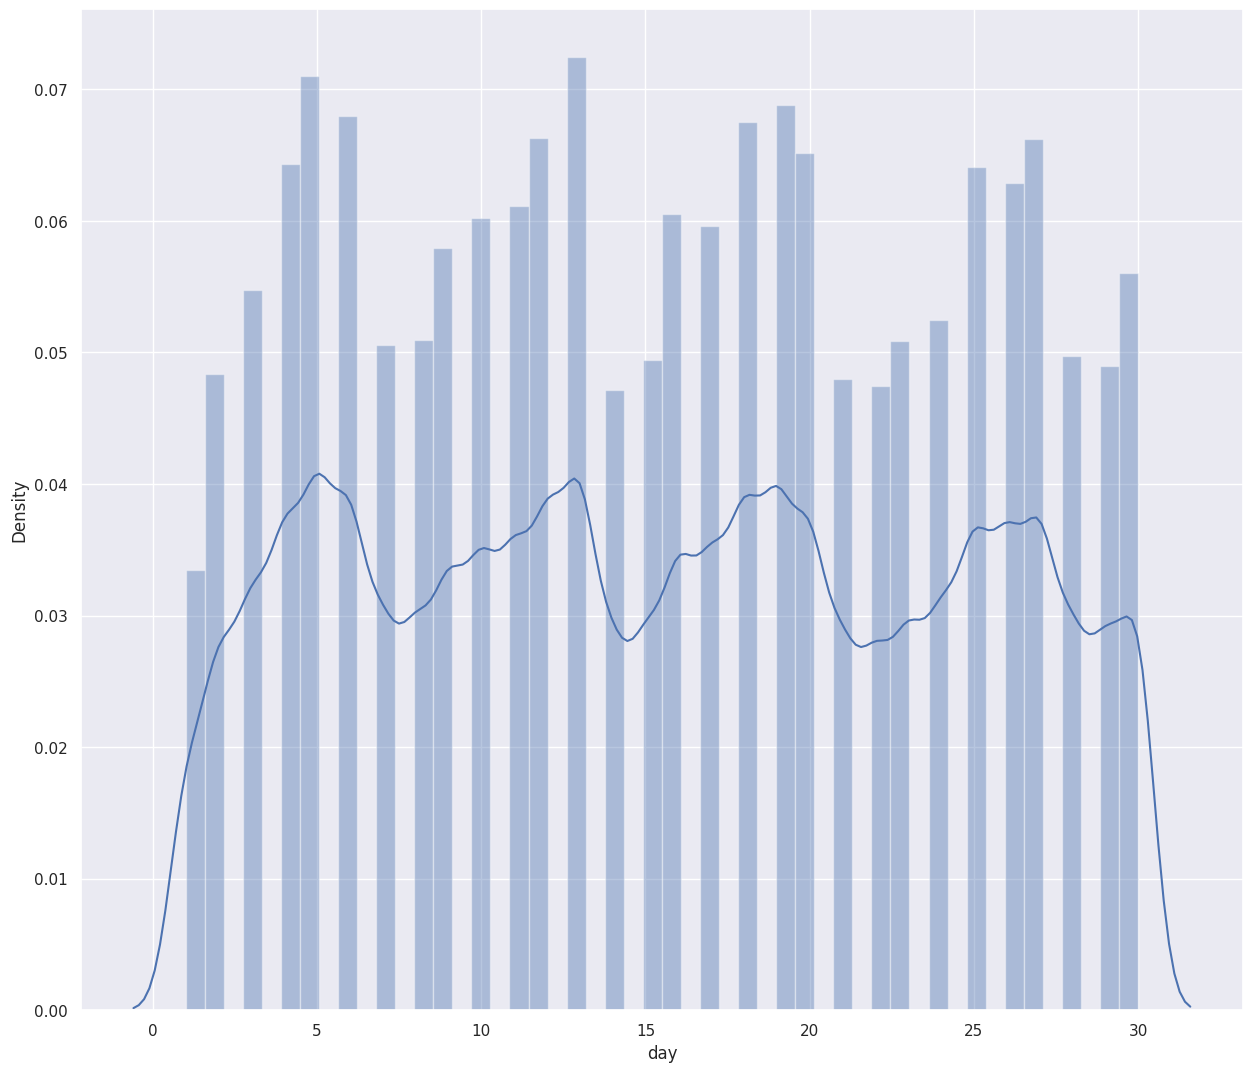

In [ ]:
sns.set(rc={'figure.figsize':(15,13)})
sns.distplot(data["day"])

<ipython-input-90-87e9f10615aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["hour"])


<Axes: xlabel='hour', ylabel='Density'>

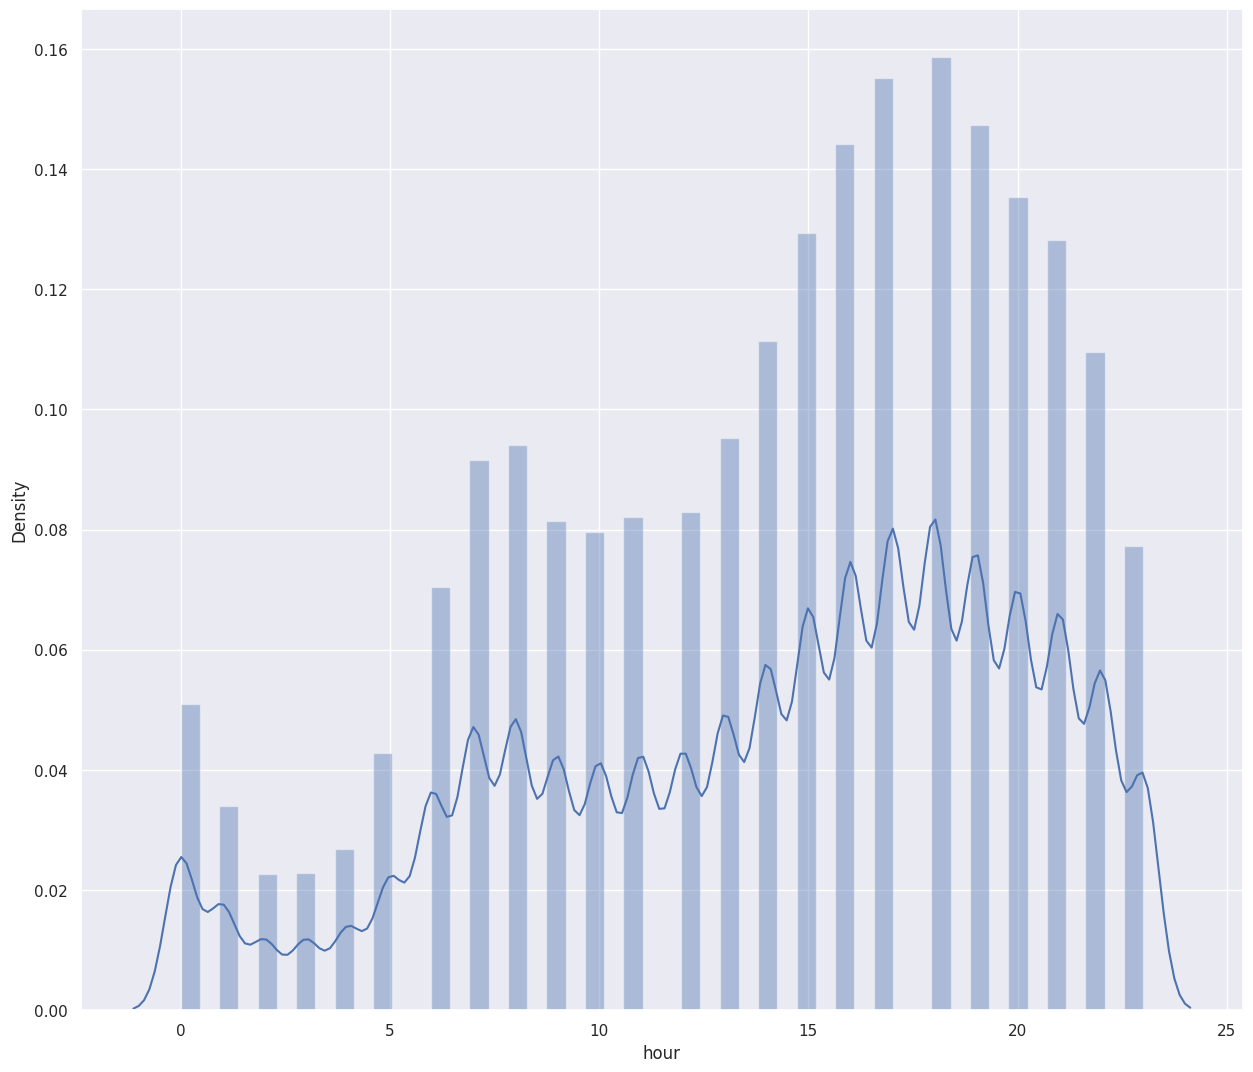

In [ ]:
sns.distplot(data["hour"])

<ipython-input-91-25638e14af01>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["weekdays"])


<Axes: xlabel='weekdays', ylabel='Density'>

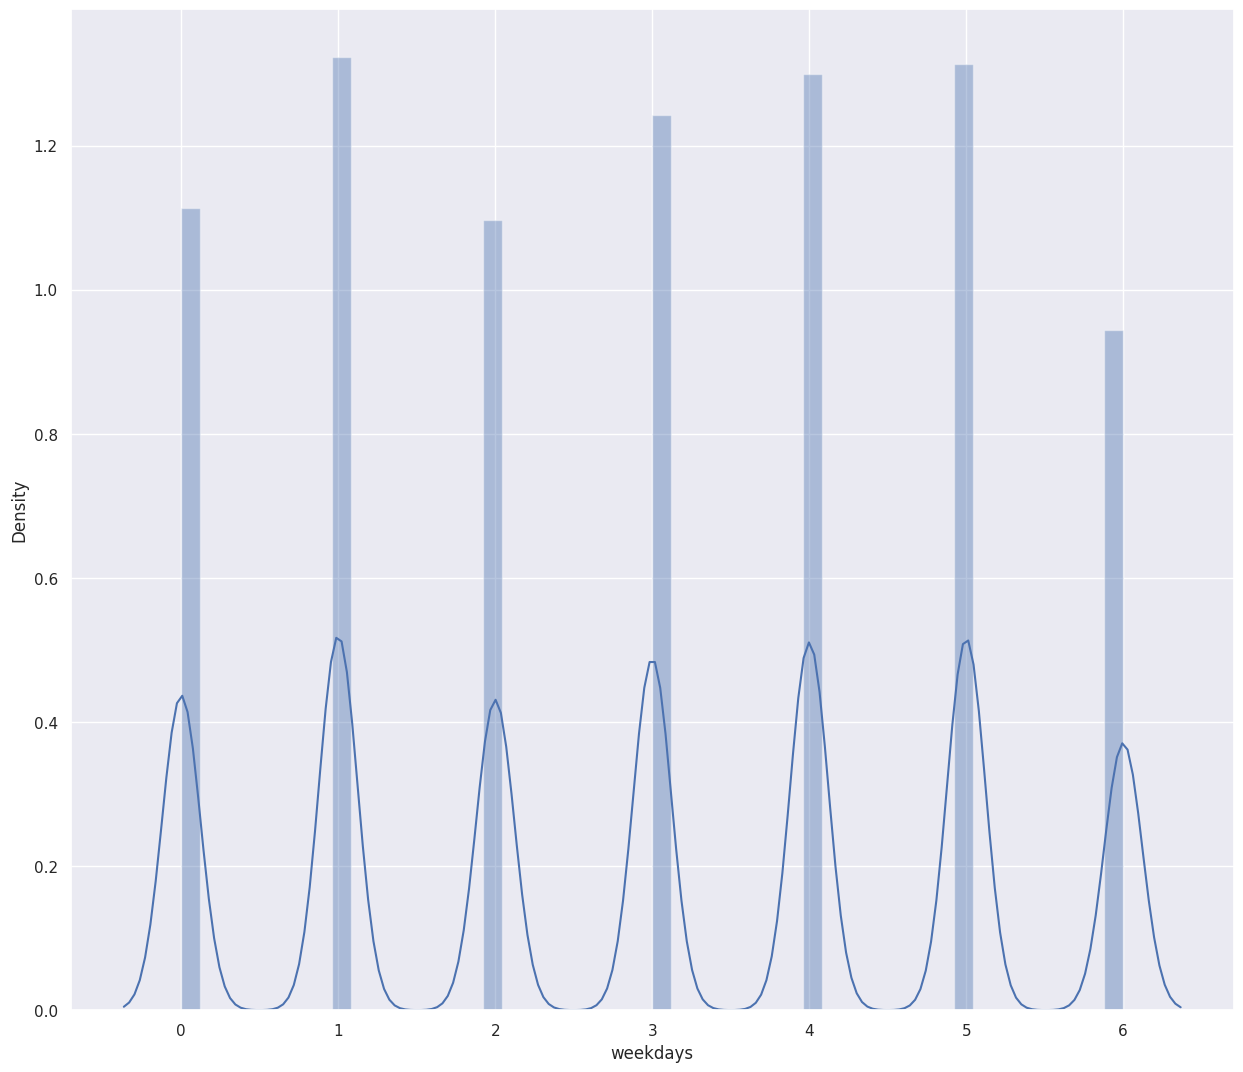

In [ ]:
sns.distplot(data["weekdays"])

<Axes: xlabel='hour', ylabel='weekdays'>

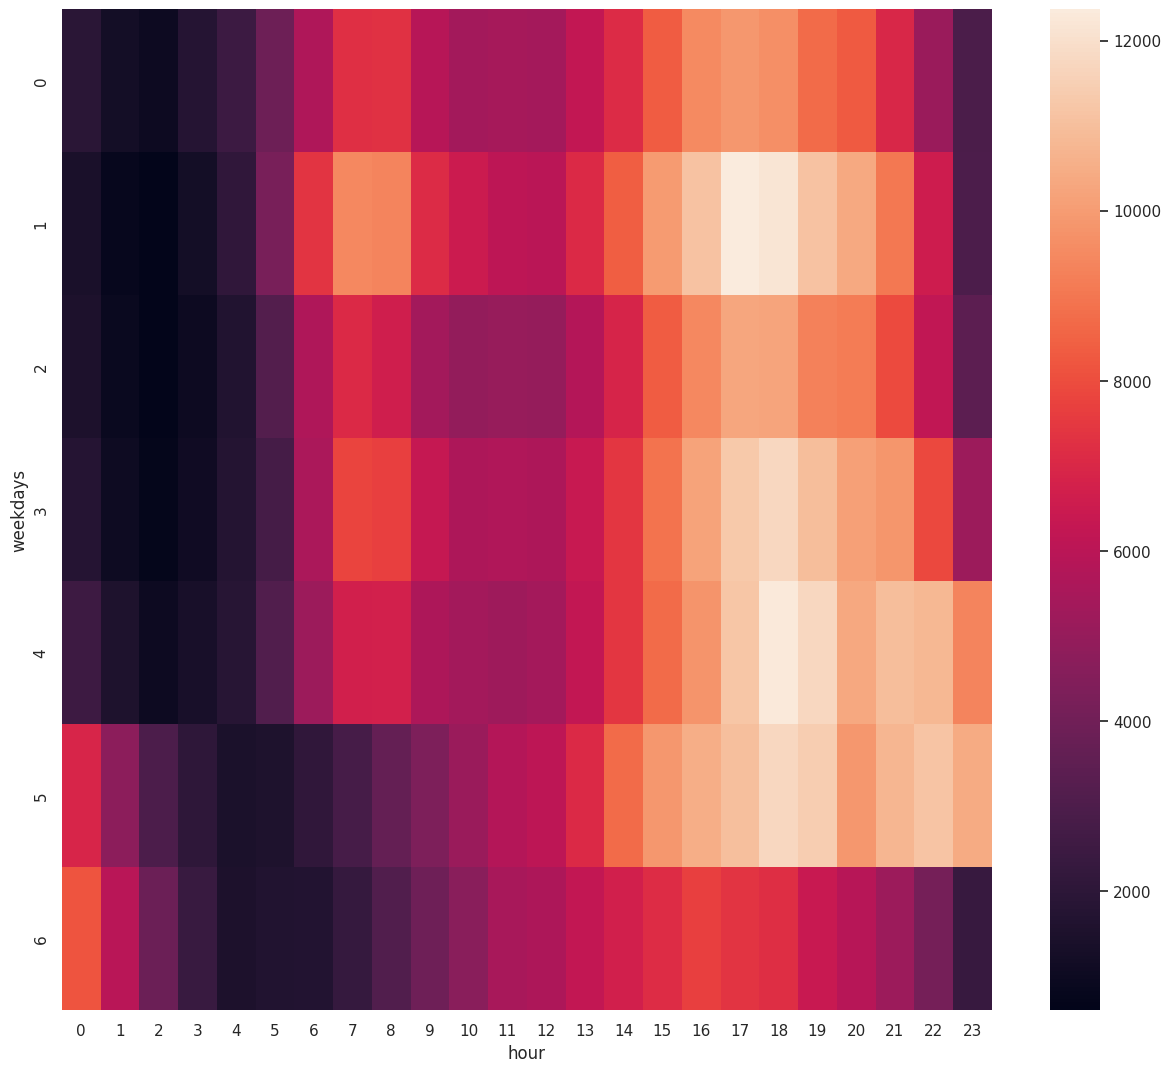

In [ ]:
df=data.groupby(['weekdays','hour']).apply(lambda x: len(x))
df=df.unstack()
sns.heatmap(df,annot=False)

In [ ]:
print(data.columns)


Index(['Date/Time', 'Lat', 'Lon', 'Base', 'day', 'weekdays', 'hour'], dtype='object')


In [ ]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
data['weekdays'] = data['Date/Time'].dt.weekday
data['hours'] = data['Date/Time'].dt.hour


<Axes: xlabel='Lon', ylabel='Lat'>

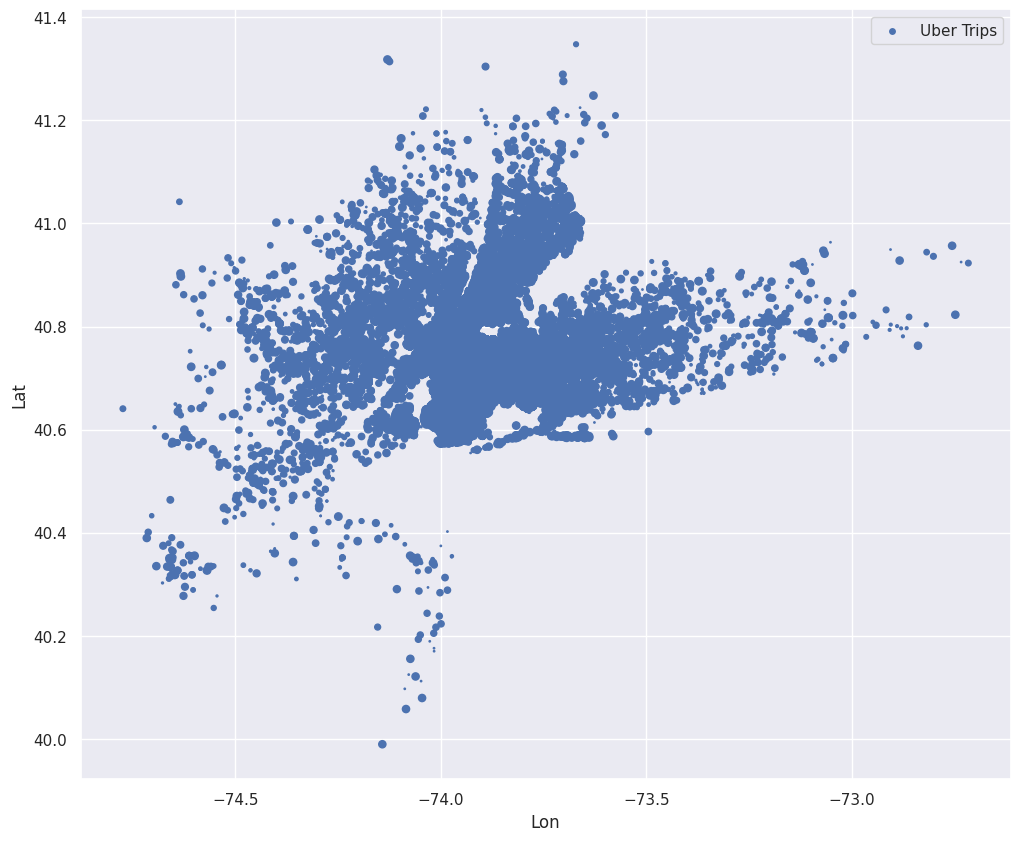

In [ ]:
data.plot(kind='scatter',x='Lon',y='Lat',s=data['day'],label='Uber Trips',figsize=(12,10))